In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.svm import SVR

from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample

df = pd.read_csv("C:/Users/HP/Downloads/Datasets/pmuvalues.csv")
df

,V1_A,V1_B,V1_C,V2_A,V2_B,V2_C,V3_A,V3_B,V3_C,V4_A,...,V12_A,V12_B,V12_C,V13_A,V13_B,V13_C,V14_A,V14_B,V14_C,OUTPUT
0,100736.884000,-252377.430400,151640.546400,84517.396350,-226757.75940,142240.36310,119386.59360,-107909.168500,-11477.42506,55708.650640,...,-2473.334644,-217166.8238,219640.1585,-2439.802386,-217037.9466,219477.7490,-2260.262208,-216370.6302,218630.8924,0
1,106174.476300,-254633.734800,148459.258600,89922.061170,-229500.30530,139578.24420,124351.74460,-111780.193600,-12571.55100,60967.010800,...,3101.960318,-220698.9477,217596.9874,3134.843494,-220569.4832,217434.6397,3313.610504,-219904.5246,216590.9141,0
2,111574.353000,-256799.574000,145225.221000,95294.782660,-232161.31670,136866.53400,129272.72120,-115611.514300,-13661.20692,66203.711300,...,8676.156833,-224152.6646,215476.5078,8708.379176,-224022.6589,215314.2797,8886.309058,-223360.2942,214473.9852,0
3,116934.600400,-258874.177700,141939.577400,100633.655500,-234739.84880,134106.19330,134147.77880,-119401.776100,-14746.00263,71416.892350,...,14247.274040,-227526.7472,213279.4731,14278.824260,-227396.2465,213117.4222,14455.854960,-226736.7120,212280.8570,0
4,122253.317700,-260856.808800,138603.491000,105936.786300,-237234.98650,131298.20020,138975.18740,-123149.636400,-15825.55098,76604.703080,...,19813.339130,-230820.0003,211006.6612,19844.205880,-230689.0509,210844.8451,20020.273650,-230032.5806,210012.3069,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32003,-8.847207,5.612426,3.234781,3928.385186,-57906.59751,53978.21233,64369.14668,-1208.798130,-63160.34855,-10166.044040,...,-42946.068230,-141775.8983,184721.9665,-42871.852720,-141634.8807,184506.7334,-42571.447460,-140732.0906,183303.5380,1
32004,-6.576793,-0.090125,6.666919,5981.424952,-59464.55143,53483.12648,67507.02809,-4374.859031,-63132.16906,-7487.779396,...,-38802.954650,-144922.6355,183725.5901,-38730.441590,-144779.7861,183510.2277,-38439.184550,-143871.9308,182311.1153,1
32005,-8.708364,5.323931,3.384433,8032.370859,-61001.38905,52969.01819,70620.90775,-7539.359214,-63081.54854,-4806.849548,...,-34646.059720,-148017.8796,182663.9393,-34575.271740,-147873.2505,182448.5222,-34293.251770,-146960.6582,181253.9100,1
32006,-6.432296,-0.380349,6.812645,10080.494160,-62516.56430,52436.07014,73709.67934,-10701.174360,-63008.50499,-2124.207054,...,-30476.860290,-151060.5313,181537.3916,-30407.819380,-150914.1750,181321.9944,-30135.121920,-149997.1760,180132.2979,1


In [3]:
class SVM_classifier():

    # initiating the hyperparameters
    def __init__(self, learning_rate, no_of_iterations, lambda_parameter, kernel, degree, gamma, coef0):

        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter
        self.kernel = kernel
        self.degree = degree      # Used only for polynomial kernel
        self.gamma = gamma        # Used only for RBF kernel
        self.coef0 = coef0        # Used for polynomial and Sigmoid kernels
        self.support_vectors_ = []
  
    # fitting the dataset to SVM Classifier
    def fit(self, X, Y):

        # m  --> number of Data points --> number of rows
        # n  --> number of input features --> number of columns
        self.m, self.n = X.shape

        # initiating the weight value and bias value
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        self.kernel_function = self.select_kernel()
    
        # implementing Gradient Descent algorithm for Optimization
        for i in range(self.no_of_iterations):
            self.update_weights()
            self.normalize_weights()

        # After training, capture support vectors
        self.support_vectors_ = self.X[(self.Y * (np.dot(self.X, self.w) - self.b)) < 1]
  
    def select_kernel(self):
        # Function to select kernel function
        if self.kernel == "auto":
            correlation_threshold = 0.5  # Threshold for linear kernel selection
            correlations = np.corrcoef(self.X.T)
            avg_correlation = np.mean(np.abs(correlations))
            variance = np.var(self.X)

            # If average correlation is high, use linear kernel
            if avg_correlation > correlation_threshold:
                print("Choosing Linear Kernel based on feature correlations")
                return lambda x, y: np.dot(x, y)
            # If variance is high, use RBF kernel
            elif variance > 1:
                print("Choosing RBF Kernel based on data characteristics")
                return lambda x, y: np.exp(-self.gamma * np.linalg.norm(x - y) ** 2)
            else:
                print("Choosing Sigmoid Kernel based on data characteristics")
                return lambda x, y: np.tanh(self.gamma * np.dot(x, y) + self.coef0)
        elif self.kernel == "linear":
            return lambda x, y: np.dot(x, y)
        elif self.kernel == "polynomial":
            return lambda x, y: (np.dot(x, y) + 1) ** self.degree
        elif self.kernel == "rbf":
            if self.gamma == "scale":
                self.gamma = 1 / (self.n * np.var(self.X))
            return lambda x, y: np.exp(-self.gamma * np.linalg.norm(x - y) ** 2)
        elif self.kernel == "sigmoid":
            return lambda x, y: np.tanh(self.gamma * np.dot(x, y) + self.coef0)
        else:
            raise ValueError("Unsupported kernel. Choose from 'linear', 'polynomial', or 'rbf'.")
  
    # function for updating the weight and bias value
    def update_weights(self):

        # label encoding
        y_label = np.where(self.Y <= 0, -1, 1)

        # gradients ( dw, db)
        for index, x_i in enumerate(self.X):
            condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1

            if (condition == True):
                dw = 2 * self.lambda_parameter * self.w
                db = 0
            else:
                dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
                db = y_label[index]

            self.w = self.w - self.learning_rate * dw
            self.b = self.b - self.learning_rate * db

    # Normalize the weights to ensure consistency
    def normalize_weights(self):
        norm = np.linalg.norm(self.w)
        if norm > 0:
            self.w /= norm

    # predict the label for a given input value
    def predict(self, X):
        output = np.dot(X, self.w) - self.b
        predicted_labels = np.sign(output)
        y_hat = np.where(predicted_labels <= -1, 0, 1)
        return y_hat

In [4]:
df.shape

(32008, 43)

In [5]:
df.describe()

,V1_A,V1_B,V1_C,V2_A,V2_B,V2_C,V3_A,V3_B,V3_C,V4_A,...,V12_A,V12_B,V12_C,V13_A,V13_B,V13_C,V14_A,V14_B,V14_C,OUTPUT
count,32008.000000,32008.000000,32008.000000,32008.000000,32008.000000,32008.000000,32008.000000,32008.000000,32008.000000,32008.000000,...,32008.000000,32008.000000,32008.000000,32008.000000,32008.000000,32008.000000,32008.000000,32008.000000,32008.000000,32008.000000
mean,-2148.064856,814.756424,1333.308433,-553.508110,184.194541,369.313570,-72.028545,22.426162,49.602382,-157.259948,...,-230.089265,42.176863,187.912402,-225.586604,40.408302,185.178302,-203.851182,31.905264,171.945918,0.875000
std,160747.498320,158386.558611,127189.539919,167267.940657,159165.340156,115712.560742,176158.933913,149138.380993,40543.953415,165653.624877,...,189089.930872,188241.034491,160719.879907,189050.994473,188149.485454,160604.629988,188915.090659,187787.591342,159950.888280,0.330724
min,-353114.655200,-368165.831300,-297418.329800,-334987.533600,-375636.645300,-285116.689700,-318844.135300,-321777.088600,-118368.744800,-294727.398300,...,-310268.004200,-381355.320400,-319432.272900,-310396.333400,-382100.990700,-319990.952000,-311575.741600,-388416.784800,-324637.618400,0.000000
25%,-104064.794775,-118750.197550,-94908.641817,-108728.620700,-121017.515650,-87958.101130,-160130.307750,-140781.360275,-29500.411058,-134788.238975,...,-183461.721375,-182873.727225,-156926.625900,-183420.114950,-182796.376275,-156819.447075,-183056.348625,-182542.740075,-155977.512875,1.000000
50%,1.572829,-0.607149,-0.566315,1368.016134,-519.499524,63.409848,972.997204,-350.765349,-107.870015,1176.430465,...,-154.135651,-586.278758,-279.193195,-134.319483,-542.529388,-258.765830,-123.301156,-814.584547,-151.367874,1.000000
75%,95262.772370,120511.628800,99830.663897,110552.631150,121113.617100,90485.421903,160767.428000,141661.995700,31389.084455,136812.293500,...,182240.599300,183195.969650,157077.889550,182199.715975,183075.819675,156918.759000,181730.181325,182645.038700,156155.189500,1.000000
max,404614.911100,335404.123600,262148.873700,416867.078200,314953.820200,231711.663100,367602.338400,267031.830900,99299.636190,379966.686600,...,398737.035100,310231.340700,253485.145300,399656.923800,310566.093900,253486.775100,407046.414900,313552.525500,253776.606100,1.000000


In [6]:
f = df.columns
f

Index(['V1_A', 'V1_B', 'V1_C', 'V2_A', 'V2_B', 'V2_C', 'V3_A', 'V3_B', 'V3_C',
       'V4_A', 'V4_B', 'V4_C', 'V5_A', 'V5_B', 'V5_C', 'V6_A', 'V6_B', 'V6_C',
       'V7_A', 'V7_B', 'V7_C', 'V8_A', 'V8_B', 'V8_C', 'V9_A', 'V9_B', 'V9_C',
       'V10_A', 'V10_B', 'V10_C', 'V11_A', 'V11_B', 'V11_C', 'V12_A', 'V12_B',
       'V12_C', 'V13_A', 'V13_B', 'V13_C', 'V14_A', 'V14_B', 'V14_C',
       'OUTPUT'],
      dtype='object')

In [7]:
df['OUTPUT'].value_counts()

OUTPUT
1    28007
0     4001
Name: count, dtype: int64

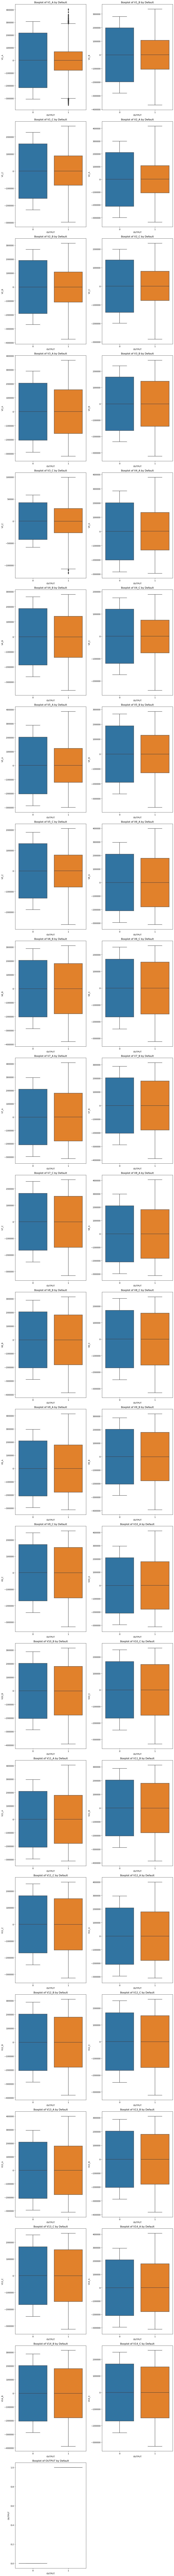

In [8]:
num_features = len(f)
num_rows = (num_features + 1) // 2

plt.figure(figsize=(12, num_rows * 8))
for idx, feature_name in enumerate(f):
    plt.subplot(num_rows, 2, idx + 1)
    sns.boxplot(x='OUTPUT', y=feature_name, data=df)
    plt.title(f'Boxplot of {feature_name} by Default')

plt.tight_layout()
plt.show()

In [9]:
# Apply IQR function
def iqr_(df, ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 - q1
    ul = q3 + 1.5 * iqr
    ll = q1 - 1.5 * iqr
    df[ft] = np.where(df[ft] > ul, ul, np.where(df[ft] < ll, ll, df[ft]))

for col in df.columns:
    if col != 'OUTPUT':
        iqr_(df, col)

In [10]:
# Split features and target variable
features = df.drop(['OUTPUT'], axis=1)
target = df['OUTPUT']

In [11]:
print(features)

                V1_A           V1_B           V1_C           V2_A  \
0      100736.884000 -252377.430400  151640.546400   84517.396350   
1      106174.476300 -254633.734800  148459.258600   89922.061170   
2      111574.353000 -256799.574000  145225.221000   95294.782660   
3      116934.600400 -258874.177700  141939.577400  100633.655500   
4      122253.317700 -260856.808800  138603.491000  105936.786300   
...              ...            ...            ...            ...   
32003      -8.847207       5.612426       3.234781    3928.385186   
32004      -6.576793      -0.090125       6.666919    5981.424952   
32005      -8.708364       5.323931       3.384433    8032.370859   
32006      -6.432296      -0.380349       6.812645   10080.494160   
32007      -8.558059       5.031566       3.526494   12125.067120   

               V2_B          V2_C          V3_A           V3_B         V3_C  \
0     -226757.75940  142240.36310  119386.59360 -107909.168500 -11477.42506   
1     -229500

In [12]:
print(target)

0        0
1        0
2        0
3        0
4        0
        ..
32003    1
32004    1
32005    1
32006    1
32007    1
Name: OUTPUT, Length: 32008, dtype: int64


In [13]:
#Data Standardization
scaler = StandardScaler()
scaler.fit(features)

StandardScaler()

In [14]:
standardized_data = scaler.transform(features)
print(standardized_data)

[[ 0.64006012 -1.59859615  1.18177632 ... -0.01088554 -1.15239731
   1.36580898]
 [ 0.67388787 -1.61284192  1.15676374 ...  0.01861956 -1.17121618
   1.353055  ]
 [ 0.70748099 -1.62651652  1.13133643 ...  0.04811845 -1.18961901
   1.33981992]
 ...
 [ 0.01331274 -0.00511057 -0.0104564  ... -0.18045109 -0.78277195
   1.13212746]
 [ 0.0133269  -0.00514658 -0.01042945 ... -0.15844017 -0.79894217
   1.12511512]
 [ 0.01331368 -0.00511241 -0.01045528 ... -0.1363725  -0.8148286
   1.1177026 ]]


In [15]:
features = standardized_data
print(features)
print(target)

[[ 0.64006012 -1.59859615  1.18177632 ... -0.01088554 -1.15239731
   1.36580898]
 [ 0.67388787 -1.61284192  1.15676374 ...  0.01861956 -1.17121618
   1.353055  ]
 [ 0.70748099 -1.62651652  1.13133643 ...  0.04811845 -1.18961901
   1.33981992]
 ...
 [ 0.01331274 -0.00511057 -0.0104564  ... -0.18045109 -0.78277195
   1.13212746]
 [ 0.0133269  -0.00514658 -0.01042945 ... -0.15844017 -0.79894217
   1.12511512]
 [ 0.01331368 -0.00511241 -0.01045528 ... -0.1363725  -0.8148286
   1.1177026 ]]
0        0
1        0
2        0
3        0
4        0
        ..
32003    1
32004    1
32005    1
32006    1
32007    1
Name: OUTPUT, Length: 32008, dtype: int64


In [16]:
df.OUTPUT.value_counts()

OUTPUT
1    28007
0     4001
Name: count, dtype: int64

<Axes: ylabel='count'>

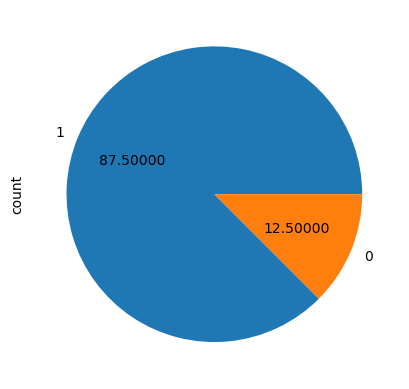

In [17]:
target.value_counts().plot.pie(autopct='%.5f')

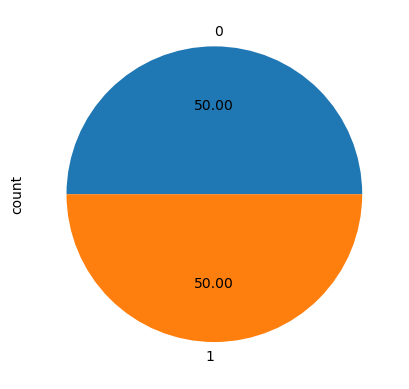

In [18]:
ros = RandomOverSampler(sampling_strategy=1)
x_res, y_res = ros.fit_resample(features, target)

ax = y_res.value_counts().plot.pie(autopct='%.2f')

In [19]:
y_res.value_counts()

OUTPUT
0    28007
1    28007
Name: count, dtype: int64

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state = 2)
print(features.shape, X_train.shape, X_test.shape)

(32008, 42) (25606, 42) (6402, 42)


In [21]:
model = SVM_classifier(learning_rate=0.001, no_of_iterations=1000, lambda_parameter=0.01,kernel="auto", degree=3, gamma="scale", coef0=1.0)

# training the SVM classifier with training data
model.fit(X_train, Y_train)

Choosing Linear Kernel based on feature correlations


In [22]:
print('Scores on Train Dataset:~')
# predict the target on the train dataset
predict_train = model.predict(X_train)
print('Target',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(Y_train,predict_train)
print('accuracy_score : ', accuracy_train)

# Precision Score on train dataset
prec = precision_score(Y_train,predict_train)
print("Precision_score :", prec)

# Recall Score on train dataset
recall = recall_score(Y_train,predict_train)
print("Recall score :", recall)

# F1 Score on train dataset
f1 = f1_score(Y_train,predict_train)
print("F1 score:", f1)


print('\nScores on Test Dataset:~')
# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(Y_test,predict_test)
print('accuracy_score : ', accuracy_test)

# Precision Score on test dataset
prec = precision_score(Y_test,predict_test)
print("Precision_score :", prec)

# Recall Score on test dataset
recall = recall_score(Y_test,predict_test)
print("Recall score :", recall)

# F1 Score on test dataset
f1 = f1_score(Y_test,predict_test)
print("F1 score:", f1)

Scores on Train Dataset:~
Target [1 1 1 ... 1 1 1]
accuracy_score :  0.8753417167851285
Precision_score : 0.8753417167851285
Recall score : 1.0
F1 score: 0.933527696793003

Scores on Test Dataset:~
Target [1 1 1 ... 1 1 1]
accuracy_score :  0.8736332396126211
Precision_score : 0.8736332396126211
Recall score : 1.0
F1 score: 0.9325552313463943


In [23]:
input_data = (5318.717373,-1982.631027,-3336.086345,5303.130759,
              -2495.137614,-2807.993145,4827.408618,-3747.86027,
              -1079.548347,5187.810735,-3123.252513,-2064.558222,
              5233.455578,-2928.583219,-2304.872358,5570.254123,
              -3291.625035,-2278.629088,5577.671715,-3290.196718,
              -2287.474997,5601.481102,-3287.581054,-2313.900048,
              5573.214725,-3296.12211,-2277.092615,5570.551116,
              -3295.14262,-2275.408496,5569.529022,-3293.232687,
              -2276.296335,5566.065086,-3293.253114,-2272.811973
              ,5565.381623,-3292.804454,-2272.577168,5564.41868,
              -3295.868594,-2268.550087)

# change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The System is in a fault condition')

else:
  print('The System is running in normal condition')

[[ 0.04645514 -0.01766205 -0.03671267  0.03501406 -0.0168339  -0.02745904
   0.02781303 -0.02528085 -0.02785048  0.03226705 -0.01947577 -0.02127105
   0.03349923 -0.01856735 -0.02240877  0.03066225 -0.0176979  -0.01533622
   0.03043615 -0.01762532 -0.01531315  0.03030004 -0.01745716 -0.01520567
   0.03045639 -0.01768151 -0.01527054  0.0304883  -0.01768957 -0.01527252
   0.03056893 -0.01769458 -0.0152984   0.03065338 -0.01771921 -0.01531088
   0.03063226 -0.01771605 -0.01530338  0.03053414 -0.01772122 -0.01525802]]
[1]
The System is running in normal condition


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# One-hot encode categorical features (assuming 'Age' is the target)
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features (X) and target (Y)
X_train = df_encoded.drop(columns='OUTPUT')  # Replace 'Age' with the correct target column
Y_train = df_encoded['OUTPUT']  # Target variable

# Ensure 'Y_train' is a continuous variable (for regression)
print(Y_train.unique())  # This should print out continuous values

# Train an SVR (Support Vector Regression) model (for regression tasks)
model = SVR(kernel='linear', C=1.0)  # Linear kernel for regression
model.fit(X_train, Y_train)

# Now plot the feature importance
def plot_feature_importance():
    # Get the weight vector (coefficients) from the trained model
    feature_names = X_train.columns  # Get feature names
    feature_importances = np.abs(model.coef_).flatten()  # Use the magnitude of the coefficients as importance
    
    # Ensure the number of features and coefficients match
    if len(feature_names) == len(feature_importances):
        # Create a bar plot of feature importance
        plt.figure(figsize=(12, 8))
        plt.barh(feature_names, feature_importances, color='purple')
        plt.title('Feature Importance Based on Weight Magnitudes')
        plt.xlabel('Weight Magnitude')
        plt.ylabel('Feature Name')
        plt.show()
    else:
        print("Shape mismatch between features and coefficients.")

# Call the function to plot feature importance
plot_feature_importance()

In [ ]:
X = df[['V5_A', 'V4_A', 'V1_C']]
y = df['OUTPUT']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train an SVM model on the selected features
svm_model = SVC(kernel='linear')
svm_model.fit(X_scaled, y)

# Retrieve coefficients to define the hyperplane
w = svm_model.coef_[0]
b = svm_model.intercept_[0]

In [ ]:
df['OUTPUT'] = df['OUTPUT'].map({0: 'Fault', 1: 'Normal'})
df

In [ ]:
import plotly.graph_objects as go

# Create a grid to visualize the hyperplane
x_vals = np.linspace(X_scaled[:, 0].min() - 3, X_scaled[:, 0].max() + 3, 50)
y_vals = np.linspace(X_scaled[:, 1].min() - 7, X_scaled[:, 1].max() + 7, 50)
xx, yy = np.meshgrid(x_vals, y_vals)
zz = (-w[0] * xx - w[1] * yy - b) / w[2]  # Solving for z in terms of x and y
offset = 35
zz = zz.reshape(xx.shape) + offset

plot = go.Figure()
for i in list(df['OUTPUT'].unique()):
    plot.add_trace(go.Scatter3d(x = df[df['OUTPUT'] == i]['V5_A'],
                                y = df[df['OUTPUT'] == i]['V4_A'],
                                z = df[df['OUTPUT'] == i]['V1_C'],
                                mode = 'markers', marker_size = 6, marker_line_width = 1, name = str(i)))

# Add the hyperplane surface
plot.add_trace(go.Surface(
    x=xx, y=yy, z=zz, colorscale='Viridis', opacity=0.5, showscale=False,
    name='Decision Boundary'
))

# Update hover and layout
plot.update_traces(hovertemplate = 'V5_A: %{x} <br>V4_A %{y} <br>V1_C %{z}')

plot.update_layout(width=800, height=800, autosize=True, showlegend=True,
                   scene = dict(xaxis=dict(title='V5_A', titlefont_color='black'),
                                yaxis=dict(title='V4_A', titlefont_color='black'),
                                zaxis=dict(title='V1_C', titlefont_color='black')),
                   font = dict(family="Gilroy", color='black', size=12))